<a href="https://colab.research.google.com/github/yegisafari/Breast-Cancer-Detection---calcifications-vs.-masses/blob/main/breast_cancer_detection_train_eval_calcification_mass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import ast
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

from skimage.io import imsave
from skimage.transform import resize

In [ ]:
data_dir =  '/content/drive/MyDrive/VinDr/files/vindr-mammo/1.0.0/'
data = pd.read_csv(os.path.join(data_dir,'finding_annotations.csv'))



In [ ]:
image_size = (512,512)


In [ ]:
image_folder = os.path.join(data_dir,'images')
data2 = data[data['study_id'].apply(lambda x : x in os.listdir(image_folder) )]

In [ ]:
data2 = data2.reset_index()

In [ ]:
data2['split'] = 'training'

In [ ]:
data2['split'].iloc[2*len(data2)//3:] = 'test'

<ipython-input-8-194dff421624>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['split'].iloc[2*len(data2)//3:] = 'test'


In [ ]:
data2['split'].value_counts()

split
training    714
test        357
Name: count, dtype: int64

# Calcification

In [ ]:
data_calc = data2[data2['finding_categories'].apply(lambda x : 'Suspicious Calcification' in x)]

In [ ]:
data_calc

,index,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
13,273,008b8e61390fcb4c0873258c15b0a53a,bd0e137f3fc5b069db934797924d7d99,e13c80239d7714e3d964b5f3e37bcff6,R,MLO,3518,2800,BI-RADS 4,DENSITY C,"['Suspicious Calcification', 'Mass']",BI-RADS 4,2241.310059,1548.170044,2646.860107,2007.229980,training
39,916,0baef459a10e51c65302ddb63012c147,4278f3bfe520a90a30aa74bfc7f9ec1c,c53418f3bc12b3173db174c86ca11355,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Suspicious Calcification'],BI-RADS 4,2272.459961,1193.630005,2575.120117,1326.760010,training
41,918,0baef459a10e51c65302ddb63012c147,4278f3bfe520a90a30aa74bfc7f9ec1c,7eb213019e972514b4ce6ccb53df509a,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Suspicious Calcification'],BI-RADS 4,2117.139893,1449.239990,2369.209961,1869.060059,training
57,1230,003700f3c960e0b9bca2b8437c3dbf05,a729825009af3184f46ef773e3d93d87,51b47f9024ccad1356354f56ac916f29,L,CC,3518,2800,BI-RADS 4,DENSITY C,['Suspicious Calcification'],BI-RADS 4,439.553986,1952.660034,498.239014,2003.880005,training
58,1231,003700f3c960e0b9bca2b8437c3dbf05,a729825009af3184f46ef773e3d93d87,3944b33b99c98e763763b9da54b4f41c,L,MLO,3518,2800,BI-RADS 4,DENSITY C,['Suspicious Calcification'],BI-RADS 4,332.628998,1801.290039,392.682007,1866.349976,training
65,1587,0246c6050121c176d2e8fcf91f22f926,411311b0bfd837e2e5a9c61daeacb38e,b5b4758224e6a66a587182fcdc5f1f1d,L,CC,3580,2812,BI-RADS 5,DENSITY B,['Suspicious Calcification'],BI-RADS 4,177.849838,961.202379,220.085723,1011.040724,training
67,1589,0246c6050121c176d2e8fcf91f22f926,411311b0bfd837e2e5a9c61daeacb38e,b5b4758224e6a66a587182fcdc5f1f1d,L,CC,3580,2812,BI-RADS 5,DENSITY B,['Suspicious Calcification'],BI-RADS 4,252.205002,1298.170044,319.835999,1422.280029,training
69,1591,0246c6050121c176d2e8fcf91f22f926,411311b0bfd837e2e5a9c61daeacb38e,0dbc1663eceef924f0f339604af18364,L,MLO,3580,2812,BI-RADS 5,DENSITY B,['Suspicious Calcification'],BI-RADS 4,527.741028,1318.770020,599.268982,1478.180054,training
70,1592,0246c6050121c176d2e8fcf91f22f926,411311b0bfd837e2e5a9c61daeacb38e,0dbc1663eceef924f0f339604af18364,L,MLO,3580,2812,BI-RADS 5,DENSITY B,['Suspicious Calcification'],BI-RADS 4,606.968994,1776.430054,670.799011,1872.520020,training
73,1631,0649398d9f65ab43072c2a475964e872,7eb269e5b28f0da2a496941a707f46f8,b50e0e1100d4f3fb389534cee03a2b03,R,MLO,3580,2812,BI-RADS 4,DENSITY C,"['Suspicious Calcification', 'Focal Asymmetry']",BI-RADS 4,2059.669922,1748.079956,2675.568445,2226.626481,training


In [ ]:
data_calc = data_calc.reset_index()
data_calc['split'] = 'training'
data_calc['split'].iloc[2*len(data_calc)//3:] = 'test'
data_calc['split'].value_counts()

In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.8 MB/s eta 0:00:00


In [ ]:
from pydicom import dcmread

In [ ]:
preproc_dir = 'images_512x512'
# out_dir = os.path.join(data_dir,preproc_dir)
out_dir = preproc_dir
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
image_folder = os.path.join(data_dir,'images')



for study_id  in data_calc['study_id'].values :

    out_path = os.path.join(out_dir,study_id)
    if not os.path.exists(out_path):
          os.makedirs(out_path)

    for image_id in data_calc[data_calc['study_id']==study_id]['image_id'].values:


      image_id = image_id.split('.')[0]
      img_path = os.path.join(data_dir, 'images', study_id, image_id + '.dicom')
      out_fn = os.path.join(out_path, image_id + '.png')


      try:
        dicom = dcmread(img_path)
        image = dicom.pixel_array
        idx = data_calc[data_calc['image_id']==image_id].index[0]


        image = resize(image, output_shape=image_size, preserve_range=True).astype(np.float32)

        # Normalize pixel intensities, and convert to 8-bit

        image = (image - image.min())/(image.max()-image.min())
        image *= 255
        # # Flip image with laterality equals right
        if data_calc.loc[idx, 'laterality'] == 'R':
            image = image[:, ::-1]

        # image.tofile(os.path.join(out_path, data.loc[idx, 'image_id'] + '.dat'))
        imsave(out_fn, image.astype(np.uint8))
      except:
        pass

# Train

In [ ]:
!pip install pytorch_lightning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 63.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-man

In [ ]:
!pip install torchsampler

In [ ]:
image_names = []
folders = []
image_folder_dir = 'images_512x512'
for folder in os.listdir(image_folder_dir):
  folders.append(folder)
  folder_path = os.path.join(image_folder_dir,folder)
  for image in os.listdir(folder_path):
    image_names.append(image)


In [ ]:
folders

['0649398d9f65ab43072c2a475964e872',
 '008b8e61390fcb4c0873258c15b0a53a',
 '0bfd4fcebaba4e9c4086edd05044a75f',
 '02bd0bd83c6d9fedc49b0df6ecd952c6',
 '003700f3c960e0b9bca2b8437c3dbf05',
 '0baef459a10e51c65302ddb63012c147',
 '01c3c13f0b852aed00b5147c21d0e649',
 '0246c6050121c176d2e8fcf91f22f926']

In [ ]:
len(image_names)

11

In [ ]:
image_names

['b50e0e1100d4f3fb389534cee03a2b03.png',
 '10e0019ae8ce05748b47e9b02131de7f.png',
 'e13c80239d7714e3d964b5f3e37bcff6.png',
 'c4a59146a1f5b9e2aca090815381c420.png',
 'a983c256635655ed394ed6805abf0499.png',
 '51b47f9024ccad1356354f56ac916f29.png',
 '3944b33b99c98e763763b9da54b4f41c.png',
 '81bf78c982ca444852fa95af7d96429c.png',
 '03b3656c726cbe0d79c86a25d4296559.png',
 'b5b4758224e6a66a587182fcdc5f1f1d.png',
 '0dbc1663eceef924f0f339604af18364.png']

In [ ]:
image_ids = list(map(lambda x : x.split('.')[0],image_names))

In [ ]:
data_calc = data_calc[data_calc['image_id'].apply(lambda x : x.split('.')[0] in image_ids)]
data_calc = data_calc[data_calc['study_id'].apply(lambda x : x in folders)]

# data_calc = data_calc.reset_index()
data_calc['split'] = 'training'
data_calc['split'].iloc[2*len(data_calc)//3:] = 'test'

data_calc

<ipython-input-51-e5689fd6a16a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_calc['split'].iloc[2*len(data_calc)//3:] = 'test'


,level_0,index,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
0,13,273,008b8e61390fcb4c0873258c15b0a53a,bd0e137f3fc5b069db934797924d7d99,e13c80239d7714e3d964b5f3e37bcff6,R,MLO,3518,2800,BI-RADS 4,DENSITY C,"['Suspicious Calcification', 'Mass']",BI-RADS 4,2241.310059,1548.170044,2646.860107,2007.229980,training
3,57,1230,003700f3c960e0b9bca2b8437c3dbf05,a729825009af3184f46ef773e3d93d87,51b47f9024ccad1356354f56ac916f29,L,CC,3518,2800,BI-RADS 4,DENSITY C,['Suspicious Calcification'],BI-RADS 4,439.553986,1952.660034,498.239014,2003.880005,training
4,58,1231,003700f3c960e0b9bca2b8437c3dbf05,a729825009af3184f46ef773e3d93d87,3944b33b99c98e763763b9da54b4f41c,L,MLO,3518,2800,BI-RADS 4,DENSITY C,['Suspicious Calcification'],BI-RADS 4,332.628998,1801.290039,392.682007,1866.349976,training
5,65,1587,0246c6050121c176d2e8fcf91f22f926,411311b0bfd837e2e5a9c61daeacb38e,b5b4758224e6a66a587182fcdc5f1f1d,L,CC,3580,2812,BI-RADS 5,DENSITY B,['Suspicious Calcification'],BI-RADS 4,177.849838,961.202379,220.085723,1011.040724,training
6,67,1589,0246c6050121c176d2e8fcf91f22f926,411311b0bfd837e2e5a9c61daeacb38e,b5b4758224e6a66a587182fcdc5f1f1d,L,CC,3580,2812,BI-RADS 5,DENSITY B,['Suspicious Calcification'],BI-RADS 4,252.205002,1298.170044,319.835999,1422.280029,training
7,69,1591,0246c6050121c176d2e8fcf91f22f926,411311b0bfd837e2e5a9c61daeacb38e,0dbc1663eceef924f0f339604af18364,L,MLO,3580,2812,BI-RADS 5,DENSITY B,['Suspicious Calcification'],BI-RADS 4,527.741028,1318.770020,599.268982,1478.180054,training
8,70,1592,0246c6050121c176d2e8fcf91f22f926,411311b0bfd837e2e5a9c61daeacb38e,0dbc1663eceef924f0f339604af18364,L,MLO,3580,2812,BI-RADS 5,DENSITY B,['Suspicious Calcification'],BI-RADS 4,606.968994,1776.430054,670.799011,1872.520020,training
9,73,1631,0649398d9f65ab43072c2a475964e872,7eb269e5b28f0da2a496941a707f46f8,b50e0e1100d4f3fb389534cee03a2b03,R,MLO,3580,2812,BI-RADS 4,DENSITY C,"['Suspicious Calcification', 'Focal Asymmetry']",BI-RADS 4,2059.669922,1748.079956,2675.568445,2226.626481,training
10,76,1634,0649398d9f65ab43072c2a475964e872,7eb269e5b28f0da2a496941a707f46f8,10e0019ae8ce05748b47e9b02131de7f,R,CC,3580,2812,BI-RADS 4,DENSITY C,"['Suspicious Calcification', 'Focal Asymmetry']",BI-RADS 4,2269.661872,1888.525949,2738.893390,2273.224082,training
11,78,1663,01c3c13f0b852aed00b5147c21d0e649,2754f9514f0338638e66bf20949635f9,03b3656c726cbe0d79c86a25d4296559,L,CC,3580,2812,BI-RADS 5,DENSITY B,['Suspicious Calcification'],BI-RADS 4,558.786399,1525.439836,722.481666,1656.396050,training


In [ ]:
len(data_calc)

15

In [ ]:
data_dir =''
data_calc.to_csv(os.path.join(data_dir,'breast-level_annotations_data_calc.csv'))

In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from argparse import ArgumentParser
from sklearn.utils import shuffle
from skimage.io import imread

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as T
from torchvision import models

import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint

from torchsampler import ImbalancedDatasetSampler
from torchmetrics.functional import auroc

data_dir = ''

image_size = (512, 512)     # image input size (depends on data pre-processing)
val_percent = 0.1           # how much of total training samples are used for model selection (default 10%)
batch_size = 20            # batch size may need to be adjusted depending on GPU memory
epochs = 8                 # number of training epochs
num_workers = 4             # number threads for data processing


class MammoDataset(Dataset):
    def __init__(self, data, data_dir, image_size, augmentation=False):
        self.data = data.reset_index(drop=True)
        self.data_dir = data_dir
        self.image_size = image_size
        self.do_augment = augmentation

        # photometric data augmentation
        self.photometric_augment = T.Compose([
            T.RandomApply(transforms=[T.ColorJitter(brightness=0.2, contrast=0.2)], p=0.5),
        ])

        # geometric data augmentation
        self.geometric_augment = T.Compose([
            T.RandomApply(transforms=[T.RandomAffine(degrees=10, scale=(0.9, 1.1))], p=0.5),
        ])

        self.samples = []
        for idx, _ in enumerate(tqdm(range(len(self.data)), desc='Loading Data')):
            img_path = os.path.join(self.data_dir, 'images_512x512', self.data.loc[idx, 'study_id'], self.data.loc[idx, 'image_id'] + '.png')
            img_label = np.array(self.data.loc[idx, 'malignancy_label'], dtype='int64')

            sample = {'image_path': img_path, 'label': img_label, 'study_id': self.data.loc[idx, 'study_id'], 'image_id': self.data.loc[idx, 'image_id']}
            self.samples.append(sample)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, item):
        sample = self.get_sample(item)

        image = torch.from_numpy(sample['image']).unsqueeze(0)
        label = torch.from_numpy(sample['label'])

        image = image.repeat(3, 1, 1)

        if self.do_augment:
            image = self.photometric_augment(image.type(torch.ByteTensor)).type(torch.FloatTensor)
            image = self.geometric_augment(image)

        return {'image': image, 'label': label, 'study_id': sample['study_id'], 'image_id': sample['image_id']}

    def get_sample(self, item):
        sample = self.samples[item]
        image = imread(sample['image_path']).astype(np.float32)

        return {'image': image, 'label': sample['label'], 'study_id': sample['study_id'], 'image_id': sample['image_id']}

    def get_labels(self):
        labels = [int(sample['label']) for sample in self.samples]
        return labels


class MammoDataModule(pl.LightningDataModule):
    def __init__(self, data_dir, image_size, val_percent, batch_size, num_workers):
        super().__init__()
        self.data_dir = data_dir
        self.image_size = image_size
        self.val_percent = val_percent
        self.batch_size = batch_size
        self.num_workers = num_workers

        self.data = pd.read_csv(os.path.join(self.data_dir,'breast-level_annotations_data_calc.csv'))
        self.data['malignancy_label'] = self.data['breast_birads']

        # Define positive and negatives based on BI-RADS categories
        self.data.loc[self.data['malignancy_label'] == 'BI-RADS 1', 'malignancy_label'] = 0
        self.data.loc[self.data['malignancy_label'] == 'BI-RADS 2', 'malignancy_label'] = 0
        self.data.loc[self.data['malignancy_label'] == 'BI-RADS 3', 'malignancy_label'] = 0
        self.data.loc[self.data['malignancy_label'] == 'BI-RADS 4', 'malignancy_label'] = 1
        self.data.loc[self.data['malignancy_label'] == 'BI-RADS 5', 'malignancy_label'] = 1

        # Use pre-defined splits to separate data into development and testing
        self.dev_data = self.data[self.data['split'] == 'training']
        self.test_data = self.data[self.data['split'] == 'test']

        # Split development data into training and validation (for model selection)
        # Making sure images from the same subject are within the same set
        unique_study_ids = self.dev_data.study_id.unique()

        unique_study_ids = shuffle(unique_study_ids)
        num_train = (round(len(unique_study_ids)*(1.0 - self.val_percent)))

        valid_sub_id = unique_study_ids[num_train:]
        self.dev_data.loc[self.dev_data.study_id.isin(valid_sub_id), "split"]="validation"

        self.train_data = self.dev_data[self.dev_data['split'] == 'training']
        self.val_data = self.dev_data[self.dev_data['split'] == 'validation']

        self.train_set = MammoDataset(self.train_data, data_dir, self.image_size, augmentation=True)
        self.val_set = MammoDataset(self.val_data, data_dir, self.image_size, augmentation=False)
        self.test_set = MammoDataset(self.test_data, data_dir, self.image_size, augmentation=False)

        train_labels = self.train_set.get_labels()
        train_class_count = np.array([len(np.where(train_labels == t)[0]) for t in np.unique(train_labels)])

        val_labels = self.val_set.get_labels()
        val_class_count = np.array([len(np.where(val_labels == t)[0]) for t in np.unique(val_labels)])

        test_labels = self.test_set.get_labels()
        test_class_count = np.array([len(np.where(test_labels == t)[0]) for t in np.unique(test_labels)])

        # print('samples (train): ',len(self.train_set))
        # # print('samples (val):   ',len(self.val_set))
        # print('samples (test):  ',len(self.test_set))
        # print('pos/neg (train): {}/{}'.format(train_class_count[1], train_class_count[0]))
        # # print('pos/neg (val):   {}/{}'.format(val_class_count[1], val_class_count[0]))
        # print('pos/neg (test):  {}/{}'.format(test_class_count[1], test_class_count[0]))
        # print('pos (train):     {:0.2f}%'.format(train_class_count[1]/len(train_labels)*100.0))
        # # print('pos (val):       {:0.2f}%'.format(val_class_count[1]/len(val_labels)*100.0))
        # print('pos (test):      {:0.2f}%'.format(test_class_count[1]/len(test_labels)*100.0))

    def train_dataloader(self):
        return DataLoader(dataset=self.train_set, batch_size=self.batch_size, sampler=ImbalancedDatasetSampler(self.train_set), num_workers=self.num_workers)

    def val_dataloader(self):
        return DataLoader(dataset=self.val_set, batch_size=self.batch_size, shuffle=False, num_workers=self.num_workers)

    def test_dataloader(self):
        return DataLoader(dataset=self.test_set, batch_size=self.batch_size, shuffle=False, num_workers=self.num_workers)


class MammoNet(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.num_classes = 2
        self.predictions = []
        self.targets = []
        self.study_ids = []
        self.image_ids = []

        self.train_step_preds = []
        self.train_step_trgts = []
        self.val_step_preds = []
        self.val_step_trgts = []

        # Default model is an ImageNet pre-trained ResNet-18
        self.model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        # self.model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

        num_features = self.model.fc.in_features
        self.model.fc = nn.Linear(num_features, self.num_classes)

    def forward(self, x):
        return self.model.forward(x)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

    def process_batch(self, batch):
        img, lab = batch['image'], batch['label']
        out = self.forward(img)
        prd = torch.softmax(out, dim=1)
        loss = F.cross_entropy(out, lab)
        return loss, prd, lab

    def training_step(self, batch, batch_idx):
        loss, prd, lab = self.process_batch(batch)
        self.train_step_preds.append(prd)
        self.train_step_trgts.append(lab)
        self.log('train_loss', loss, batch_size=batch_size)
        batch_ratio = len(np.where(lab.cpu().numpy() == 1)[0]) / len(np.where(lab.cpu().numpy() == 0)[0])
        self.log('batch_ratio', batch_ratio, batch_size=batch_size)
        grid = torchvision.utils.make_grid(batch['image'][0:4, ...], nrow=2, normalize=True)
        self.logger.experiment.add_image('images', grid, self.global_step)
        return loss

    def on_train_epoch_end(self):
        all_preds = torch.cat(self.train_step_preds, dim=0)
        all_trgts = torch.cat(self.train_step_trgts, dim=0)
        auc = auroc(all_preds, all_trgts, num_classes=self.num_classes, average='macro', task='multiclass')
        self.log('train_auc', auc, batch_size=len(all_preds))
        self.train_step_preds.clear()
        self.train_step_trgts.clear()

    def validation_step(self, batch, batch_idx):
        loss, prd, lab = self.process_batch(batch)
        self.val_step_preds.append(prd)
        self.val_step_trgts.append(lab)
        self.log('val_loss', loss, batch_size=batch_size)

    def on_validation_epoch_end(self):
        all_preds = torch.cat(self.val_step_preds, dim=0)
        all_trgts = torch.cat(self.val_step_trgts, dim=0)
        auc = auroc(all_preds, all_trgts, num_classes=self.num_classes, average='macro', task='multiclass')
        self.log('val_auc', auc, batch_size=len(all_preds))
        self.val_step_preds.clear()
        self.val_step_trgts.clear()

    def on_test_start(self):
        self.predictions = []
        self.targets = []
        self.study_ids = []
        self.image_ids = []

    def test_step(self, batch, batch_idx):
        _, prd, lab = self.process_batch(batch)
        self.predictions.append(prd)
        self.targets.append(lab.squeeze())
        self.study_ids.append(batch['study_id'])
        self.image_ids.append(batch['image_id'])


def save_predictions(model, output_fname):
    prds = torch.cat(model.predictions, dim=0)
    trgs = torch.cat(model.targets, dim=0)
    std_ids = [id for sublist in model.study_ids for id in sublist]
    img_ids = [id for sublist in model.image_ids for id in sublist]

    auc = auroc(prds, trgs, num_classes=2, average='macro', task='multiclass')

    print('AUROC (test)')
    print(auc)

    cols_names = ['class_' + str(i) for i in range(0, 2)]

    df = pd.DataFrame(data=prds.cpu().numpy(), columns=cols_names)
    df['target'] = trgs.cpu().numpy()
    df['study_id'] = std_ids
    df['image_id'] = img_ids
    df.to_csv(output_fname, index=False)


def main():

    # sets seeds for numpy, torch, python.random and PYTHONHASHSEED.
    pl.seed_everything(42, workers=True)

    # data
    data = MammoDataModule(data_dir=data_dir,
                              image_size=image_size,
                              val_percent=val_percent,
                              batch_size=batch_size,
                              num_workers=num_workers)

    # model
    model = MammoNet()

    # Create output directory
    output_base_dir = 'output-calc'
    output_name = 'resnet18'
    output_dir = os.path.join(output_base_dir,output_name)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    print('=============================================================')
    print('Training...')

    # train
    checkpoint_callback = ModelCheckpoint(monitor="val_loss", mode='min')
    trainer = pl.Trainer(
        callbacks=[checkpoint_callback],
        log_every_n_steps=5,
        max_epochs=epochs,
        accelerator='gpu',
        devices=1,
        logger=TensorBoardLogger(output_base_dir, name=output_name),
    )
    trainer.logger._default_hp_metric = False
    trainer.fit(model, data)

    model = MammoNet.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)

    print('=============================================================')
    print('Testing...')

    trainer.test(model=model, datamodule=data)
    save_predictions(model=model, output_fname=os.path.join(output_dir, 'predictions_calc.csv'))




In [ ]:



main()

INFO:lightning_fabric.utilities.seed:Seed set to 42

Loading Data: 100%|██████████| 8/8 [00:00<00:00, 7711.89it/s]

Loading Data: 100%|██████████| 2/2 [00:00<00:00, 3157.17it/s]

Loading Data: 100%|██████████| 5/5 [00:00<00:00, 5674.11it/s]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training...


INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type   | Params | Mode 
-----------------------------------------
0 | model | ResNet | 11.2 M | train
-----------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.710    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028
/usr/local/lib/python3.10/dist-packa

Training: |          | 0/? [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


ZeroDivisionError: division by zero

# evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
result_dir = 'output-calc/resnet18/'
data = pd.read_csv(result_dir + 'predictions_calc.csv')

In [ ]:
data

,class_0,class_1,target,study_id,image_id
0,1.0,3.191098e-17,1,01c3c13f0b852aed00b5147c21d0e649,81bf78c982ca444852fa95af7d96429c
1,1.0,5.134068e-23,0,02bd0bd83c6d9fedc49b0df6ecd952c6,a983c256635655ed394ed6805abf0499
2,1.0,5.134068e-23,0,02bd0bd83c6d9fedc49b0df6ecd952c6,a983c256635655ed394ed6805abf0499
3,1.0,3.099238e-39,0,02bd0bd83c6d9fedc49b0df6ecd952c6,c4a59146a1f5b9e2aca090815381c420
4,1.0,3.099238e-39,0,02bd0bd83c6d9fedc49b0df6ecd952c6,c4a59146a1f5b9e2aca090815381c420


In [ ]:
preds = np.stack([data['class_0'],data['class_1']]).transpose()
targets = np.array(data['target'])
fpr, tpr, _ = roc_curve(targets, preds[:,1])
roc_auc = auc(fpr, tpr)

In [ ]:
preds.argmax(axis=1)

array([0, 0, 0, 0, 0])

In [ ]:
targets

array([1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
confusion_matrix(targets,preds.argmax(axis=1))

array([[4, 0],
       [1, 0]])

In [ ]:
print(classification_report(targets,preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


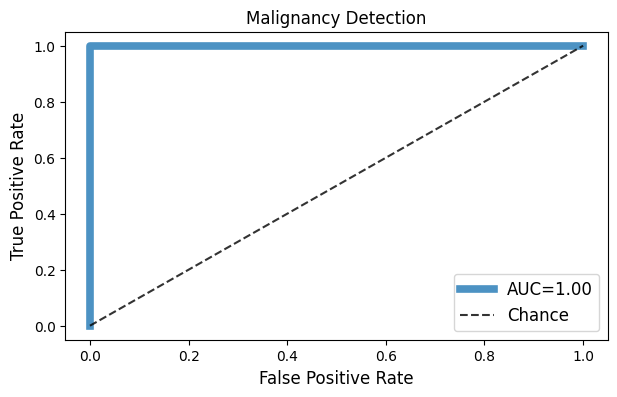

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
plt.plot(fpr, tpr, lw=5.5, alpha=.8, label='AUC=%0.2f' % roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--', lw=1.5, color='k', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.title('Malignancy Detection', fontsize=12)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
plt.show()

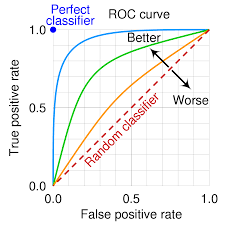

# Mass


In [ ]:
data_dir =  '/content/drive/MyDrive/VinDr/files/vindr-mammo/1.0.0/'
data = pd.read_csv(os.path.join(data_dir,'finding_annotations.csv'))

image_folder = os.path.join(data_dir,'images')
data2 = data[data['study_id'].apply(lambda x : x in os.listdir(image_folder) )]
data_mass = data2[data2['finding_categories'].apply(lambda x : 'Mass' in x)]

In [ ]:
data_mass

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
147,0ac8b6988e7443dc5e45d601a2f813f1,5ba467af7b95bdc4a6a6c874d8831af2,b5dd38ab5b600ce41e1afafe67f56b3c,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,2407.300049,2194.500000,2599.939941,2301.129883,training
148,0ac8b6988e7443dc5e45d601a2f813f1,5ba467af7b95bdc4a6a6c874d8831af2,b5dd38ab5b600ce41e1afafe67f56b3c,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,2553.840088,2399.510010,2694.189941,2519.909912,training
232,0910d9262da2398810b2f2bc32b77088,d762229f235fa0068d18cf4b00b354a3,eff50bb27749afa48947f9fcce83c929,L,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,410.653015,1247.390015,647.039001,1514.170044,test
233,0910d9262da2398810b2f2bc32b77088,d762229f235fa0068d18cf4b00b354a3,c1bbd7498883deb078c151ee8ef2e3e2,L,MLO,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,356.260010,1624.930054,695.942017,2022.939941,test
259,012e0595adba5173b6e60a97f9e84b6e,a80a25f4bb029ba92a3ae1c6babcc767,202d1c29785f6327985ffda7100e2265,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,2156.969971,1779.829956,2528.510010,2224.290039,training
260,012e0595adba5173b6e60a97f9e84b6e,a80a25f4bb029ba92a3ae1c6babcc767,f6c7f3c3e03d612002800f20b1282309,L,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,347.218994,1493.280029,791.203003,2061.719971,training
261,012e0595adba5173b6e60a97f9e84b6e,a80a25f4bb029ba92a3ae1c6babcc767,7adeb584564fc161d897a3fc719acd17,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,2147.270020,1982.520020,2524.250000,2382.840088,training
262,012e0595adba5173b6e60a97f9e84b6e,a80a25f4bb029ba92a3ae1c6babcc767,edb7f6e44809405ec40a9c2537da62e6,L,MLO,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,384.390991,1576.329956,797.698975,2054.760010,training
272,008b8e61390fcb4c0873258c15b0a53a,bd0e137f3fc5b069db934797924d7d99,f1f79501410a98782c0a03b48e66df83,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2216.669922,983.671021,2659.770020,1460.280029,training
273,008b8e61390fcb4c0873258c15b0a53a,bd0e137f3fc5b069db934797924d7d99,e13c80239d7714e3d964b5f3e37bcff6,R,MLO,3518,2800,BI-RADS 4,DENSITY C,"['Suspicious Calcification', 'Mass']",BI-RADS 4,2241.310059,1548.170044,2646.860107,2007.229980,training


In [ ]:
data_mass = data_mass.reset_index()
data_mass['split'] = 'training'
data_mass['split'].iloc[2*len(data_mass)//3:] = 'test'
data_mass['split'].value_counts()

<ipython-input-84-e99629529fde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mass['split'].iloc[2*len(data_mass)//3:] = 'test'


split
training    38
test        20
Name: count, dtype: int64

In [ ]:
from pydicom import dcmread

In [ ]:
preproc_dir = 'images_512x512_mass'
data_dir =  '/content/drive/MyDrive/VinDr/files/vindr-mammo/1.0.0/'

# out_dir = os.path.join(data_dir,preproc_dir)
out_dir = preproc_dir
if not os.path.exists(out_dir):
    os.makedirs(out_dir)
image_folder = os.path.join(data_dir,'images')



for study_id  in data_mass['study_id'].values :

    out_path = os.path.join(out_dir,study_id)
    if not os.path.exists(out_path):
          os.makedirs(out_path)

    for image_id in data_mass[data_mass['study_id']==study_id]['image_id'].values:


      image_id = image_id.split('.')[0]
      img_path = os.path.join(data_dir, 'images', study_id, image_id + '.dicom')
      out_fn = os.path.join(out_path, image_id + '.png')


      try:
        dicom = dcmread(img_path)
        image = dicom.pixel_array
        idx = data_mass[data_mass['image_id']==image_id].index[0]


        image = resize(image, output_shape=image_size, preserve_range=True).astype(np.float32)

        # Normalize pixel intensities, and convert to 8-bit

        image = (image - image.min())/(image.max()-image.min())
        image *= 255
        # # Flip image with laterality equals right
        if data_mass.loc[idx, 'laterality'] == 'R':
            image = image[:, ::-1]

        # image.tofile(os.path.join(out_path, data.loc[idx, 'image_id'] + '.dat'))
        imsave(out_fn, image.astype(np.uint8))
      except:
        pass

# Train

In [ ]:
image_names = []
folders = []
image_folder_dir = 'images_512x512_mass'
for folder in os.listdir(image_folder_dir):
  folders.append(folder)
  folder_path = os.path.join(image_folder_dir,folder)
  for image in os.listdir(folder_path):
    image_names.append(image)


In [ ]:
folders

['02c9621d5af7d0485e20c071f605678c',
 '0939c6e7137f2c883403ef0971c99d53',
 '0ac8b6988e7443dc5e45d601a2f813f1',
 '064741fa1cf1c410df6bd8cf69a64acf',
 '0649398d9f65ab43072c2a475964e872',
 '008b8e61390fcb4c0873258c15b0a53a',
 '08ba91bb945c4dbc738b3f0a2e5798e6',
 '07a0dbae70b94afb01313eeeeaaef9ac',
 '0910d9262da2398810b2f2bc32b77088',
 '0676f4386325058f95263c823b0ee347',
 '0928a31ce88182b08f89a6aa72354037',
 '08db0293a555cc089d14e6357381d42d',
 '0b86a34d84ac7587f7374589268debf3',
 '08d8818f81810c7979df66dccf549932',
 '014d843f13a9d86fec945664e2541fe6',
 '0cc015fba720993209f0b8843ff98699',
 '030561532b801ef4b623657ebee557bd',
 '0a3018e7ad1d1d7d2e142c2ca7c518fa',
 '09c1cd951e5569d928f49bdca14b8337',
 '00a369b4ec1e5e0ff34e6bd838e5f2d6',
 '04bcbfd7491cb850f6f8a01a3c3c1361',
 '0baef459a10e51c65302ddb63012c147',
 '012e0595adba5173b6e60a97f9e84b6e',
 '01c3c13f0b852aed00b5147c21d0e649',
 '0246c6050121c176d2e8fcf91f22f926']

In [ ]:
len(image_names)

41

In [ ]:
image_names

['3a69cb46471f1417f099a177608cd5c1.png',
 '40344cff30da62d2e72446944c156932.png',
 'bb97a6f3d9cf4e685a34c6bd5dec36bd.png',
 '478aa6494133e2a21495eca5d22e0ac8.png',
 '32aee5744779b09f3d55c07435c8c9e3.png',
 '6450616fa854fa9d7a26d111e880792e.png',
 'b50e0e1100d4f3fb389534cee03a2b03.png',
 'f1f79501410a98782c0a03b48e66df83.png',
 'e13c80239d7714e3d964b5f3e37bcff6.png',
 '59efa30f975f06c7d17042c190fd7c42.png',
 '07f468d6fff5b3e3b512e4b95cf0cdda.png',
 '726355704c0328a581f9182fee4d198f.png',
 '21a78229489f5b35b0b037f678a5cac4.png',
 'c1bbd7498883deb078c151ee8ef2e3e2.png',
 'eff50bb27749afa48947f9fcce83c929.png',
 '77f6c807dcdbd4f5b9305219fa5d9779.png',
 '0e31855d02eadf8670ffaeeaeddbf229.png',
 'a67700794287a21aea3695ccab16311f.png',
 '0602173c47d1b21fe548b2d852433a03.png',
 'a697cd84b7b97518603b8fd39674dd01.png',
 '19aa7e28743b204e978558c4fed12fd2.png',
 '370f48157f08675de0b49988b7c39622.png',
 'a3abc78b80b104b171f2dd76c215f1a5.png',
 'e82b6324ff951df4158627cf430996b7.png',
 'a629996b0281b6

In [ ]:
image_ids = list(map(lambda x : x.split('.')[0],image_names))

In [ ]:
data_mass = data_mass[data_mass['image_id'].apply(lambda x : x.split('.')[0] in image_ids)]
data_mass = data_mass[data_mass['study_id'].apply(lambda x : x in folders)]

# data_mass = data_mass.reset_index()
data_mass['split'] = 'training'
data_mass['split'].iloc[2*len(data_mass)//3:] = 'test'

data_mass

<ipython-input-94-2e846f726c94>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mass['split'].iloc[2*len(data_mass)//3:] = 'test'


,index,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
2,232,0910d9262da2398810b2f2bc32b77088,d762229f235fa0068d18cf4b00b354a3,eff50bb27749afa48947f9fcce83c929,L,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,410.653015,1247.390015,647.039001,1514.170044,training
3,233,0910d9262da2398810b2f2bc32b77088,d762229f235fa0068d18cf4b00b354a3,c1bbd7498883deb078c151ee8ef2e3e2,L,MLO,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,356.260010,1624.930054,695.942017,2022.939941,training
4,259,012e0595adba5173b6e60a97f9e84b6e,a80a25f4bb029ba92a3ae1c6babcc767,202d1c29785f6327985ffda7100e2265,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,2156.969971,1779.829956,2528.510010,2224.290039,training
5,260,012e0595adba5173b6e60a97f9e84b6e,a80a25f4bb029ba92a3ae1c6babcc767,f6c7f3c3e03d612002800f20b1282309,L,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,347.218994,1493.280029,791.203003,2061.719971,training
6,261,012e0595adba5173b6e60a97f9e84b6e,a80a25f4bb029ba92a3ae1c6babcc767,7adeb584564fc161d897a3fc719acd17,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,2147.270020,1982.520020,2524.250000,2382.840088,training
7,262,012e0595adba5173b6e60a97f9e84b6e,a80a25f4bb029ba92a3ae1c6babcc767,edb7f6e44809405ec40a9c2537da62e6,L,MLO,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,384.390991,1576.329956,797.698975,2054.760010,training
8,272,008b8e61390fcb4c0873258c15b0a53a,bd0e137f3fc5b069db934797924d7d99,f1f79501410a98782c0a03b48e66df83,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2216.669922,983.671021,2659.770020,1460.280029,training
9,273,008b8e61390fcb4c0873258c15b0a53a,bd0e137f3fc5b069db934797924d7d99,e13c80239d7714e3d964b5f3e37bcff6,R,MLO,3518,2800,BI-RADS 4,DENSITY C,"['Suspicious Calcification', 'Mass']",BI-RADS 4,2241.310059,1548.170044,2646.860107,2007.229980,training
10,318,00a369b4ec1e5e0ff34e6bd838e5f2d6,0da08b11f65b222c697727fd32ab068e,2feab51140b38f9ec90e17b7006501b2,L,MLO,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,187.735001,1143.689941,476.614990,1469.520020,training
11,387,09c1cd951e5569d928f49bdca14b8337,1d1c552c1f8ff6802fc11e13531f30eb,4222799fe0cfa6c38deebb89967baec9,L,CC,3518,2800,BI-RADS 3,DENSITY C,['Mass'],BI-RADS 3,122.875999,1129.250000,362.886993,1364.849976,training


In [ ]:
len(data_mass)

49

In [ ]:
data_dir =''
data_mass.to_csv(os.path.join(data_dir,'breast-level_annotations_data_mass.csv'))

In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from argparse import ArgumentParser
from sklearn.utils import shuffle
from skimage.io import imread

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import torchvision
import torchvision.transforms as T
from torchvision import models

import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint

from torchsampler import ImbalancedDatasetSampler
from torchmetrics.functional import auroc

data_dir = ''

image_size = (512, 512)     # image input size (depends on data pre-processing)
val_percent = 0.1           # how much of total training samples are used for model selection (default 10%)
batch_size = 20            # batch size may need to be adjusted depending on GPU memory
epochs = 8                 # number of training epochs
num_workers = 4             # number threads for data processing


class MammoDataset(Dataset):
    def __init__(self, data, data_dir, image_size, augmentation=False):
        self.data = data.reset_index(drop=True)
        self.data_dir = data_dir
        self.image_size = image_size
        self.do_augment = augmentation

        # photometric data augmentation
        self.photometric_augment = T.Compose([
            T.RandomApply(transforms=[T.ColorJitter(brightness=0.2, contrast=0.2)], p=0.5),
        ])

        # geometric data augmentation
        self.geometric_augment = T.Compose([
            T.RandomApply(transforms=[T.RandomAffine(degrees=10, scale=(0.9, 1.1))], p=0.5),
        ])

        self.samples = []
        for idx, _ in enumerate(tqdm(range(len(self.data)), desc='Loading Data')):
            img_path = os.path.join(self.data_dir, 'images_512x512_mass', self.data.loc[idx, 'study_id'], self.data.loc[idx, 'image_id'] + '.png')
            img_label = np.array(self.data.loc[idx, 'malignancy_label'], dtype='int64')

            sample = {'image_path': img_path, 'label': img_label, 'study_id': self.data.loc[idx, 'study_id'], 'image_id': self.data.loc[idx, 'image_id']}
            self.samples.append(sample)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, item):
        sample = self.get_sample(item)

        image = torch.from_numpy(sample['image']).unsqueeze(0)
        label = torch.from_numpy(sample['label'])

        image = image.repeat(3, 1, 1)

        if self.do_augment:
            image = self.photometric_augment(image.type(torch.ByteTensor)).type(torch.FloatTensor)
            image = self.geometric_augment(image)

        return {'image': image, 'label': label, 'study_id': sample['study_id'], 'image_id': sample['image_id']}

    def get_sample(self, item):
        sample = self.samples[item]
        image = imread(sample['image_path']).astype(np.float32)

        return {'image': image, 'label': sample['label'], 'study_id': sample['study_id'], 'image_id': sample['image_id']}

    def get_labels(self):
        labels = [int(sample['label']) for sample in self.samples]
        return labels


class MammoDataModule(pl.LightningDataModule):
    def __init__(self, data_dir, image_size, val_percent, batch_size, num_workers):
        super().__init__()
        self.data_dir = data_dir
        self.image_size = image_size
        self.val_percent = val_percent
        self.batch_size = batch_size
        self.num_workers = num_workers

        self.data = pd.read_csv(os.path.join(self.data_dir,'breast-level_annotations_data_mass.csv'))
        self.data['malignancy_label'] = self.data['breast_birads']

        # Define positive and negatives based on BI-RADS categories
        self.data.loc[self.data['malignancy_label'] == 'BI-RADS 1', 'malignancy_label'] = 0
        self.data.loc[self.data['malignancy_label'] == 'BI-RADS 2', 'malignancy_label'] = 0
        self.data.loc[self.data['malignancy_label'] == 'BI-RADS 3', 'malignancy_label'] = 0
        self.data.loc[self.data['malignancy_label'] == 'BI-RADS 4', 'malignancy_label'] = 1
        self.data.loc[self.data['malignancy_label'] == 'BI-RADS 5', 'malignancy_label'] = 1

        # Use pre-defined splits to separate data into development and testing
        self.dev_data = self.data[self.data['split'] == 'training']
        self.test_data = self.data[self.data['split'] == 'test']

        # Split development data into training and validation (for model selection)
        # Making sure images from the same subject are within the same set
        unique_study_ids = self.dev_data.study_id.unique()

        unique_study_ids = shuffle(unique_study_ids)
        num_train = (round(len(unique_study_ids)*(1.0 - self.val_percent)))

        valid_sub_id = unique_study_ids[num_train:]
        self.dev_data.loc[self.dev_data.study_id.isin(valid_sub_id), "split"]="validation"

        self.train_data = self.dev_data[self.dev_data['split'] == 'training']
        self.val_data = self.dev_data[self.dev_data['split'] == 'validation']

        self.train_set = MammoDataset(self.train_data, data_dir, self.image_size, augmentation=True)
        self.val_set = MammoDataset(self.val_data, data_dir, self.image_size, augmentation=False)
        self.test_set = MammoDataset(self.test_data, data_dir, self.image_size, augmentation=False)

        train_labels = self.train_set.get_labels()
        train_class_count = np.array([len(np.where(train_labels == t)[0]) for t in np.unique(train_labels)])

        val_labels = self.val_set.get_labels()
        val_class_count = np.array([len(np.where(val_labels == t)[0]) for t in np.unique(val_labels)])

        test_labels = self.test_set.get_labels()
        test_class_count = np.array([len(np.where(test_labels == t)[0]) for t in np.unique(test_labels)])

        # print('samples (train): ',len(self.train_set))
        # # print('samples (val):   ',len(self.val_set))
        # print('samples (test):  ',len(self.test_set))
        # print('pos/neg (train): {}/{}'.format(train_class_count[1], train_class_count[0]))
        # # print('pos/neg (val):   {}/{}'.format(val_class_count[1], val_class_count[0]))
        # print('pos/neg (test):  {}/{}'.format(test_class_count[1], test_class_count[0]))
        # print('pos (train):     {:0.2f}%'.format(train_class_count[1]/len(train_labels)*100.0))
        # # print('pos (val):       {:0.2f}%'.format(val_class_count[1]/len(val_labels)*100.0))
        # print('pos (test):      {:0.2f}%'.format(test_class_count[1]/len(test_labels)*100.0))

    def train_dataloader(self):
        return DataLoader(dataset=self.train_set, batch_size=self.batch_size, sampler=ImbalancedDatasetSampler(self.train_set), num_workers=self.num_workers)

    def val_dataloader(self):
        return DataLoader(dataset=self.val_set, batch_size=self.batch_size, shuffle=False, num_workers=self.num_workers)

    def test_dataloader(self):
        return DataLoader(dataset=self.test_set, batch_size=self.batch_size, shuffle=False, num_workers=self.num_workers)


class MammoNet(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.num_classes = 2
        self.predictions = []
        self.targets = []
        self.study_ids = []
        self.image_ids = []

        self.train_step_preds = []
        self.train_step_trgts = []
        self.val_step_preds = []
        self.val_step_trgts = []

        # Default model is an ImageNet pre-trained ResNet-18
        self.model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
        # self.model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)

        num_features = self.model.fc.in_features
        self.model.fc = nn.Linear(num_features, self.num_classes)

    def forward(self, x):
        return self.model.forward(x)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

    def process_batch(self, batch):
        img, lab = batch['image'], batch['label']
        out = self.forward(img)
        prd = torch.softmax(out, dim=1)
        loss = F.cross_entropy(out, lab)
        return loss, prd, lab

    def training_step(self, batch, batch_idx):
        loss, prd, lab = self.process_batch(batch)
        self.train_step_preds.append(prd)
        self.train_step_trgts.append(lab)
        self.log('train_loss', loss, batch_size=batch_size)
        batch_ratio = len(np.where(lab.cpu().numpy() == 1)[0]) / len(np.where(lab.cpu().numpy() == 0)[0])
        self.log('batch_ratio', batch_ratio, batch_size=batch_size)
        grid = torchvision.utils.make_grid(batch['image'][0:4, ...], nrow=2, normalize=True)
        self.logger.experiment.add_image('images', grid, self.global_step)
        return loss

    def on_train_epoch_end(self):
        all_preds = torch.cat(self.train_step_preds, dim=0)
        all_trgts = torch.cat(self.train_step_trgts, dim=0)
        auc = auroc(all_preds, all_trgts, num_classes=self.num_classes, average='macro', task='multiclass')
        self.log('train_auc', auc, batch_size=len(all_preds))
        self.train_step_preds.clear()
        self.train_step_trgts.clear()

    def validation_step(self, batch, batch_idx):
        loss, prd, lab = self.process_batch(batch)
        self.val_step_preds.append(prd)
        self.val_step_trgts.append(lab)
        self.log('val_loss', loss, batch_size=batch_size)

    def on_validation_epoch_end(self):
        all_preds = torch.cat(self.val_step_preds, dim=0)
        all_trgts = torch.cat(self.val_step_trgts, dim=0)
        auc = auroc(all_preds, all_trgts, num_classes=self.num_classes, average='macro', task='multiclass')
        self.log('val_auc', auc, batch_size=len(all_preds))
        self.val_step_preds.clear()
        self.val_step_trgts.clear()

    def on_test_start(self):
        self.predictions = []
        self.targets = []
        self.study_ids = []
        self.image_ids = []

    def test_step(self, batch, batch_idx):
        _, prd, lab = self.process_batch(batch)
        self.predictions.append(prd)
        self.targets.append(lab.squeeze())
        self.study_ids.append(batch['study_id'])
        self.image_ids.append(batch['image_id'])


def save_predictions(model, output_fname):
    prds = torch.cat(model.predictions, dim=0)
    trgs = torch.cat(model.targets, dim=0)
    std_ids = [id for sublist in model.study_ids for id in sublist]
    img_ids = [id for sublist in model.image_ids for id in sublist]

    auc = auroc(prds, trgs, num_classes=2, average='macro', task='multiclass')

    print('AUROC (test)')
    print(auc)

    cols_names = ['class_' + str(i) for i in range(0, 2)]

    df = pd.DataFrame(data=prds.cpu().numpy(), columns=cols_names)
    df['target'] = trgs.cpu().numpy()
    df['study_id'] = std_ids
    df['image_id'] = img_ids
    df.to_csv(output_fname, index=False)


def main():

    # sets seeds for numpy, torch, python.random and PYTHONHASHSEED.
    pl.seed_everything(42, workers=True)

    # data
    data = MammoDataModule(data_dir=data_dir,
                              image_size=image_size,
                              val_percent=val_percent,
                              batch_size=batch_size,
                              num_workers=num_workers)

    # model
    model = MammoNet()

    # Create output directory
    output_base_dir = 'output-mass'
    output_name = 'resnet18'
    output_dir = os.path.join(output_base_dir,output_name)
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    print('=============================================================')
    print('Training...')

    # train
    checkpoint_callback = ModelCheckpoint(monitor="val_loss", mode='min')
    trainer = pl.Trainer(
        callbacks=[checkpoint_callback],
        log_every_n_steps=5,
        max_epochs=epochs,
        accelerator='gpu',
        devices=1,
        logger=TensorBoardLogger(output_base_dir, name=output_name),
    )
    trainer.logger._default_hp_metric = False
    trainer.fit(model, data)

    model = MammoNet.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)

    print('=============================================================')
    print('Testing...')

    trainer.test(model=model, datamodule=data)
    save_predictions(model=model, output_fname=os.path.join(output_dir, 'predictions_mass.csv'))




In [ ]:



main()

INFO:lightning_fabric.utilities.seed:Seed set to 42

Loading Data: 100%|██████████| 30/30 [00:00<00:00, 12093.14it/s]

Loading Data: 100%|██████████| 2/2 [00:00<00:00, 2387.88it/s]

Loading Data: 100%|██████████| 17/17 [00:00<00:00, 10225.61it/s]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type   | Params | Mode 
-----------------------------------------
0 | model | ResNet | 11.2 M | train
-----------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.710    Total estimated model params size (MB)


Training...


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No negative samples in targets, false positive value should be meaningless. Returning zero tensor in false positive score
  warnings.warn(*args, **kwargs)  # noqa: B028
/usr/local/lib/python3.10/dist-pac

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No negative samples in targets, false positive value should be meaningless. Returning zero tensor in false positive score
  warnings.warn(*args, **kwargs)  # noqa: B028
/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=8` reached.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing...


Testing: |          | 0/? [00:00<?, ?it/s]

AUROC (test)
tensor(0.4615, device='cuda:0')


# evaluation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
result_dir = 'output-mass/resnet18/'
data = pd.read_csv(result_dir + 'predictions_mass.csv')

In [ ]:
data

,class_0,class_1,target,study_id,image_id
0,0.979879,0.020120,1,0a3018e7ad1d1d7d2e142c2ca7c518fa,4f78dc1158558f3f6753e055c1c318a4
1,0.990759,0.009241,0,0939c6e7137f2c883403ef0971c99d53,bb97a6f3d9cf4e685a34c6bd5dec36bd
2,0.988484,0.011516,0,0939c6e7137f2c883403ef0971c99d53,478aa6494133e2a21495eca5d22e0ac8
3,0.988496,0.011504,1,0246c6050121c176d2e8fcf91f22f926,b5b4758224e6a66a587182fcdc5f1f1d
4,0.988496,0.011504,1,0246c6050121c176d2e8fcf91f22f926,b5b4758224e6a66a587182fcdc5f1f1d
5,0.978649,0.021351,1,0246c6050121c176d2e8fcf91f22f926,0dbc1663eceef924f0f339604af18364
6,0.978649,0.021351,1,0246c6050121c176d2e8fcf91f22f926,0dbc1663eceef924f0f339604af18364
7,0.964098,0.035902,1,0649398d9f65ab43072c2a475964e872,b50e0e1100d4f3fb389534cee03a2b03
8,0.984508,0.015492,1,01c3c13f0b852aed00b5147c21d0e649,03b3656c726cbe0d79c86a25d4296559
9,0.985676,0.014324,1,01c3c13f0b852aed00b5147c21d0e649,81bf78c982ca444852fa95af7d96429c


In [ ]:
preds = np.stack([data['class_0'],data['class_1']]).transpose()
targets = np.array(data['target'])
fpr, tpr, _ = roc_curve(targets, preds[:,1])
roc_auc = auc(fpr, tpr)

In [ ]:
preds.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
targets

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
confusion_matrix(targets,preds.argmax(axis=1))

array([[ 4,  0],
       [13,  0]])

In [ ]:
print(classification_report(targets,preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.24      1.00      0.38         4
           1       0.00      0.00      0.00        13

    accuracy                           0.24        17
   macro avg       0.12      0.50      0.19        17
weighted avg       0.06      0.24      0.09        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


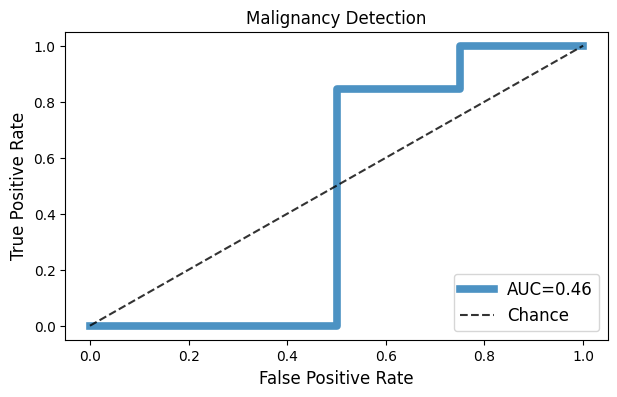

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
plt.plot(fpr, tpr, lw=5.5, alpha=.8, label='AUC=%0.2f' % roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--', lw=1.5, color='k', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.title('Malignancy Detection', fontsize=12)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05])
plt.show()

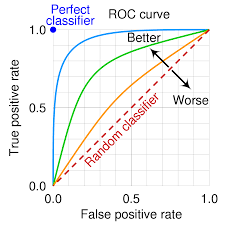

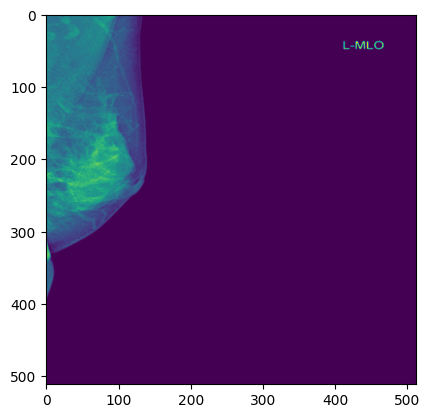

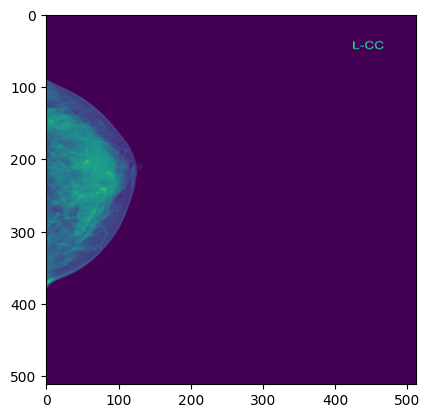

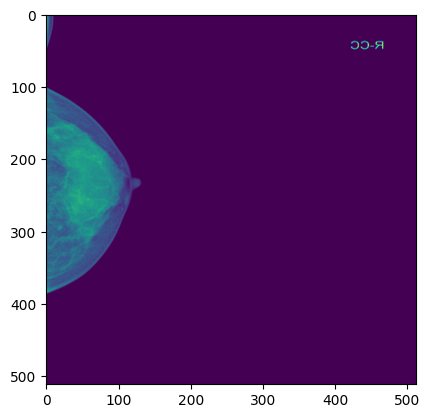

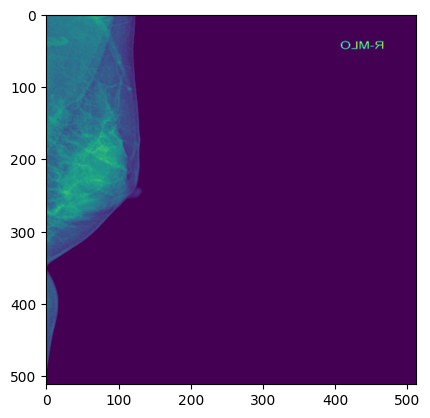

In [ ]:
import matplotlib.pyplot as plt
images_512_512 = os.path.join(data_dir,'images_512x512')
my_study_id = '00bed569a272c750cf03b561886a1489'
for image_name in os.listdir(os.path.join(images_512_512,my_study_id)):
  img = plt.imread(os.path.join(images_512_512,my_study_id,image_name))
  plt.imshow(img)
  plt.show()
